In [1]:
print("hw")

%load_ext autoreload
%autoreload 2

hw


In [2]:
from ocpaper231.data import get_dm


from ocpaper231.names import variable_manager
from pytorch_lightning import Trainer

from gnn_tracking.models.graph_construction import MLGraphConstruction

from ocpaper231.data import model_exchange_path
from gnn_tracking.graph_construction.k_scanner import GraphConstructionKNNScanner
from gnn_tracking.training.ml import MLModule
import pandas as pd
from matplotlib import pyplot as plt
import scienceplots
from ocpaper231.plotutils import Plot
from sklearn.manifold import TSNE

from pathlib import Path

plt.style.use(["science", "notebook"])

/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
chkpt_path = Path(
    "/home/dc3896/devdoot-gnn-tracking-experiments/experiments/lightning_logs/quiet-origami-prawn/checkpoints/epoch=136-n_edges_frac_segment50_95=197442.95.ckpt"
)

In [4]:
# model_exchange_path / "gc" / "eggplant-quail-of-tempest.ckpt"
lmodel = MLModule.load_from_checkpoint(chkpt_path, map_location="cpu")
lmodel.gc_scanner = GraphConstructionKNNScanner(ks=list(range(1, 20)))

[19:58:16] DEBUG: Getting class GraphConstructionFCNN from module gnn_tracking.models.graph_construction
[19:58:16] DEBUG: Getting class GraphConstructionHingeEmbeddingLoss from module gnn_tracking.metrics.losses
[19:58:16] DEBUG: Getting class GraphConstructionKNNScanner from module gnn_tracking.graph_construction.k_scanner


In [5]:
lmodel

MLModule(
  (model): GraphConstructionFCNN(
    (_encoder): Linear(in_features=14, out_features=256, bias=False)
    (_decoder): Linear(in_features=256, out_features=8, bias=False)
    (_layers): ModuleList(
      (0-4): 5 x Linear(in_features=256, out_features=256, bias=False)
    )
  )
  (loss_fct): GraphConstructionHingeEmbeddingLoss()
)

In [6]:
lmodel.gc_scanner

In [12]:
dm = get_dm()

[20:00:18] INFO: DataLoader will load 900 graphs (out of 900 available).
[20:00:18] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v8/part_1/data21000_s0.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v8/part_1/data21999_s0.pt
[20:00:18] INFO: DataLoader will load 5 graphs (out of 1000 available).
[20:00:18] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v8/part_9/data29000_s0.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v8/part_9/data29004_s0.pt


In [ ]:
trainer = Trainer()
_ = trainer.validate(model=lmodel, datamodule=dm, verbose=False)

## FOMs vs k

In [8]:
lmodel.gc_scanner.get_results().df

,frac50,frac75,frac100,n_edges,efficiency,purity,max_n_particles_pt0.9,max_n_cleaned_clusters_pt0.9,max_perfect_pt0.9,max_double_majority_pt0.9,max_lhc_pt0.9,max_fake_perfect_pt0.9,max_fake_double_majority_pt0.9,max_fake_lhc_pt0.9,k
k,,,,,,,,,,,,,,,
1,0.455987,0.222515,0.167120,55085.6,0.116977,0.705587,1404.0,1402.2,0.167120,0.447760,1.0,0.832650,0.551971,0.0,1
2,0.807937,0.590145,0.486269,108825.8,0.224540,0.650337,1404.0,1667.4,0.486269,0.802539,1.0,0.590974,0.324852,0.0,2
3,0.919006,0.777993,0.690019,161324.4,0.324908,0.612174,1404.0,1452.2,0.690019,0.915379,1.0,0.333190,0.115467,0.0,3
4,0.952699,0.869529,0.801949,212298.0,0.414566,0.576990,1404.0,1390.0,0.801949,0.949684,1.0,0.190411,0.041272,0.0,4
5,0.964833,0.907000,0.852161,261406.2,0.493954,0.545026,1404.0,1381.2,0.852161,0.962630,1.0,0.134183,0.021926,0.0,5
6,0.972531,0.926890,0.883222,308199.8,0.563201,0.516354,1404.0,1379.0,0.883222,0.970478,1.0,0.101076,0.012237,0.0,6
7,0.975663,0.938004,0.898962,352475.0,0.624633,0.492247,1404.0,1380.0,0.898962,0.973610,1.0,0.085708,0.009765,0.0,7
8,0.979276,0.946058,0.912714,394014.4,0.680055,0.472075,1404.0,1380.4,0.912714,0.977212,1.0,0.071912,0.006311,0.0,8
9,0.982494,0.951502,0.921822,432660.4,0.729901,0.455212,1404.0,1382.4,0.921822,0.980708,1.0,0.063951,0.004144,0.0,9


In [25]:
class GCEffsVsKPlot(Plot):
    FILENAME = "gc_vs_k"

    def __init__(self, df: pd.DataFrame, **kwargs):
        super().__init__(**kwargs)
        self.df = df
        self.ax.set_xlabel("$k$")

    def add_var(self, v: str, label=None, **kwargs):
        if label is None:
            label = variable_manager[v].latex
        self.ax.plot("k", v, data=self.df, label=label, **kwargs)

    def plot(self):
        for v in ["efficiency", "purity"]:
            self.add_var(v, marker="o")
        for v in ["max_double_majority_pt0.9", "max_perfect_pt0.9"]:
            label = f"EC upper bound on {variable_manager[v[len('max_'):]].latex}"
            self.add_var(v, ls="-", marker="o", label=label)
        self.ax.legend()

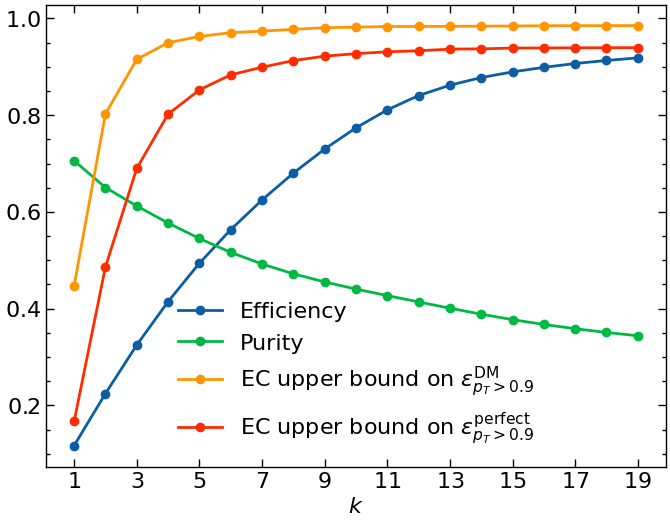

In [26]:
gce = GCEffsVsKPlot(
    lmodel.gc_scanner.get_results().df,
    # model=chkpt_path.stem,
    # watermark="preliminary",
    ax=None,
)

from matplotlib.ticker import NullLocator

gce.ax.set_xticks(list(range(1, 20, 2)))
gce.ax.xaxis.set_minor_locator(NullLocator())
gce.plot()
gce.save(Path.home() / "paperresults/finding_k.pdf")

## Edges vs k

In [14]:
class GCNEdgesVsKPlot(Plot):
    def __init__(self, df: pd.DataFrame, **kwargs):
        super().__init__(**kwargs)
        self.df = df
        self.ax.set_xlabel("$k$")
        self.ax.set_ylabel("Number of edges")

    def plot(self):
        self.ax.plot("k", "n_edges", data=self.df, marker="o")

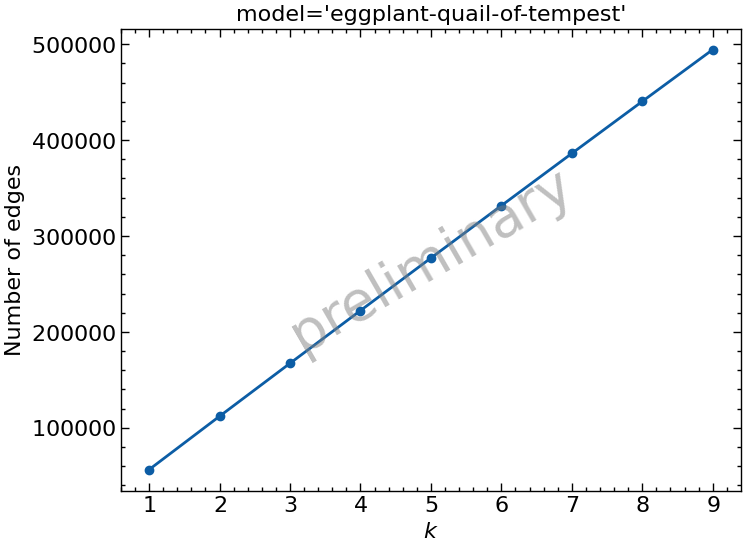

In [16]:
gcne = GCNEdgesVsKPlot(
    lmodel.gc_scanner.get_results().df,
    model=chkpt_path.stem,
    watermark="preliminary",
    ax=None,
)
gcne.plot()

## TSNE

In [49]:
data = dm.datasets["val"][0]
latent = lmodel.model(data)["H"]

In [50]:
x_tsne = TSNE(
    n_components=2, learning_rate="auto", init="random", perplexity=3, n_jobs=6
).fit_transform(data.x)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [51]:
latent_tsne = TSNE(
    n_components=2, learning_rate="auto", init="random", perplexity=3, n_jobs=6
).fit_transform(latent.detach().cpu().numpy())

In [52]:
import torch
import numpy as np

selected_pids = torch.Tensor(
    np.random.choice(data.particle_id[data.pt > 0.9], 7).astype("int64")
)

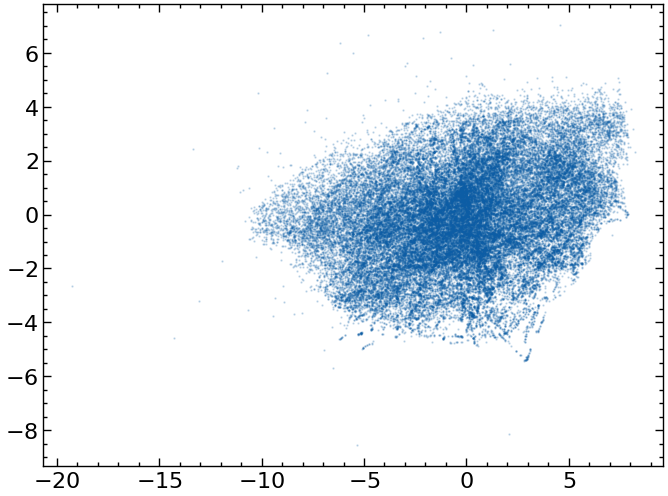

In [106]:
l = latent.detach().cpu().numpy()
plt.scatter(l[:, 5], l[:, 7], alpha=0.2, s=0.5)

In [89]:
from gnn_tracking.analysis.latent import get_color_mapper


class SimpleLatentSpacePlot(Plot):
    def __init__(self, latent_space, particle_id, selected_pids, *, ax=None, **kwargs):
        if ax is None:
            _, ax = plt.subplots(subplot_kw=dict(box_aspect=1))
        super().__init__(ax=ax, **kwargs)
        self.latent_space = latent_space
        self._particle_id = particle_id
        self._color_mapper = get_color_mapper(selected_pids)
        self._selected_pid_mask = torch.isin(particle_id, selected_pids)
        self.ax.set_xlabel("TSNE Dimension 1 [arbitrary units]")
        self.ax.set_ylabel("TSNE Dimension 2 [arbitrary units]")

    def plot(self):
        self.ax.scatter(
            self.latent_space[~self._selected_pid_mask, 0],
            self.latent_space[~self._selected_pid_mask, 1],
            c="k",
            s=0.5,
            alpha=0.1,
        )
        self.ax.scatter(
            self.latent_space[self._selected_pid_mask, 0],
            self.latent_space[self._selected_pid_mask, 1],
            # c=,
            marker="o",
            facecolors="none",
            edgecolors=self._color_mapper(self._particle_id[self._selected_pid_mask]),
            linewidths=2.0,
        )

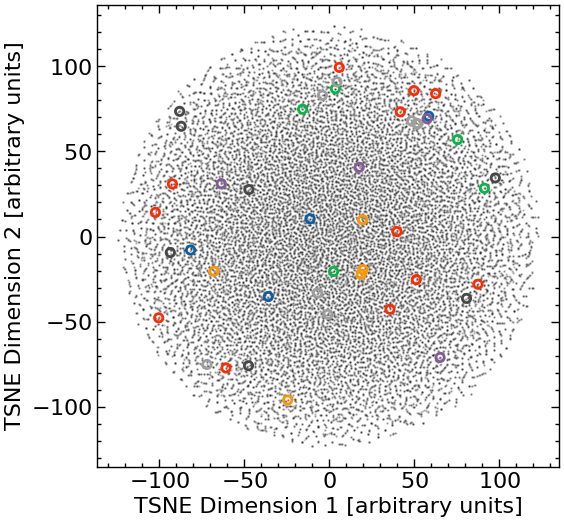

In [109]:
slsp = SimpleLatentSpacePlot(
    x_tsne,
    data.particle_id,
    selected_pids,
    ax=None,
    # model=chkpt_path.stem,
    # watermark="preliminary",
)
slsp.plot()
slsp.save(Path.home() / "paperresults/tsne_input.png")

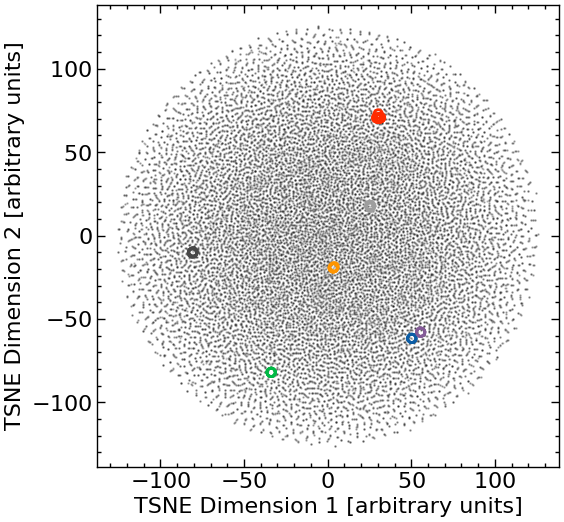

In [110]:
slsp = SimpleLatentSpacePlot(
    latent_tsne,
    data.particle_id,
    selected_pids,
    ax=None,
    # model=chkpt_path.stem,
    # watermark="preliminary",
)
slsp.plot()
slsp.save(Path.home() / "paperresults/tsne_gc.png")

(60.0, 80.0)

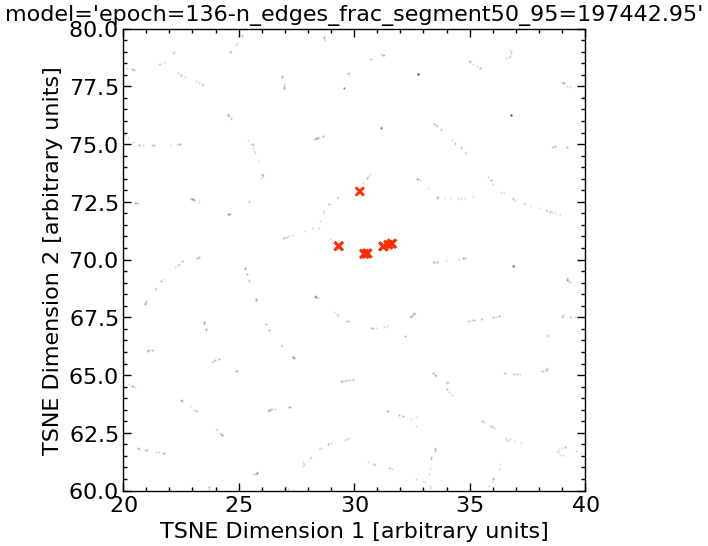

In [77]:
slsp = SimpleLatentSpacePlot(
    latent_tsne,
    data.particle_id,
    selected_pids,
    ax=None,
    model=chkpt_path.stem,
    # watermark="preliminary",
)
slsp.plot()
slsp.ax.set_xlim(20, 40)
slsp.ax.set_ylim(60, 80)

# Directly doing tracking

tcmodule = TCModule(lmodel.model)

In [32]:
from gnn_tracking.training.tc import TCModule


class EvalOnlyTCModule(TCModule):
    """Let's hack it so we can quickly apply it to the GC model"""

    def get_losses(self, *args, **kwargs):
        return 0, {}


tcmodule = EvalOnlyTCModule(model=lmodel.model)

In [33]:
import numpy as np

eps = np.linspace(0.01, 1, 20)
ks = np.arange(1, 5)
trials = []
for e in eps:
    for k in ks:
        trials.append({"eps": e, "min_samples": k})


from gnn_tracking.postprocessing.dbscanscanner import DBSCANHyperParamScannerFixed

tcmodule.cluster_scanner = DBSCANHyperParamScannerFixed(
    trials=trials,
)
device = "cpu"
trainer = Trainer(accelerator=device)

/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3 ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [34]:
trainer = Trainer(accelerator=device)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [35]:
_ = trainer.validate(tcmodule, dm, ckpt_path="last", verbose=False)

/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:186: .validate(ckpt_path="last") is set, but there is no last checkpoint available. No checkpoint will be loaded.
[20:05:38] INFO: DataLoader will load 5 graphs (out of 1000 available).
[20:05:38] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v8/part_9/data29000_s0.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/point_clouds_v8/part_9/data29004_s0.pt
/scratch/gpfs/kl5675/micromamba/envs/gnn/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=2` in the `DataLoader` to improve performance.


Validation: |                                                                                    | 0/? [00:00<…

NaN or Inf found in input tensor.
NaN or Inf found in input tensor.


In [36]:
from ocpaper231.names import variable_manager as vm


class TracksVsDBSCANPlot(Plot):
    def __init__(self, mean_df: pd.DataFrame, **kwargs):
        super().__init__(**kwargs)
        self.df = mean_df.sort_values("eps")
        self.ax.set_xlabel(r"DBSCAN $\varepsilon$")
        self.ax.set_ylabel("Metric")

    def plot_var(self, var, secondary_k=4, **kwargs):
        line, *_ = self.ax.errorbar(
            "eps",
            var,
            yerr=f"{var}_std",
            data=self.df[self.df["min_samples"] == 1],
            label=vm[var].latex,
            marker="o",
            **kwargs,
        )
        color = line.get_color()
        if secondary_k:
            self.ax.plot(
                "eps",
                var,
                data=self.df[self.df["min_samples"] == secondary_k],
                marker="",
                color=color,
                ls=":",
                label="_hide",
                **kwargs,
            )

In [41]:
import pickle

with Path("~/paperresults/gc_vs_eps.pkl").expanduser().open("wb") as f:
    pickle.dump(tcmodule.cluster_scanner, f)

In [42]:
with Path("~/paperresults/gc_vs_eps.pkl").expanduser().open("rb") as f:
    tcmodule.cluster_scanner = pickle.load(f)

In [45]:
max_dm = tvdp.df["double_majority_pt0.9"].max()

In [46]:
max_dm_idx = tvdp.df["double_majority_pt0.9"].argmax()

In [47]:
max_dm_eps = tvdp.df.loc[max_dm_idx]["eps"]
max_dm_eps

0.4268421052631579

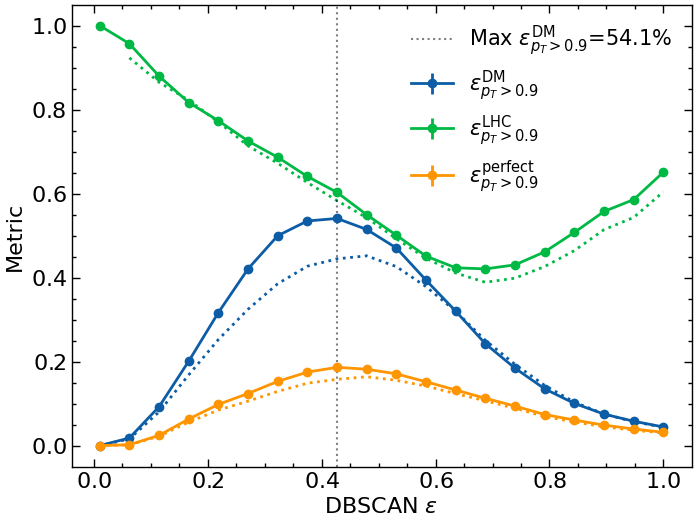

In [48]:
tvdp = TracksVsDBSCANPlot(
    mean_df=tcmodule.cluster_scanner.get_results().df_mean,
    # model=model,
    # watermark="outdated",
)
secondary_k = 4
tvdp.plot_var("double_majority_pt0.9", secondary_k=secondary_k)
tvdp.plot_var("lhc_pt0.9", secondary_k=secondary_k)
tvdp.plot_var("perfect_pt0.9", secondary_k=secondary_k)
dm_label = vm["double_majority_pt0.9"].latex
tvdp.ax.axvline(
    max_dm_eps,
    color="k",
    ls=":",
    lw=1.5,
    alpha=0.5,
    label=rf"Max {dm_label}={100*max_dm:.1f}%",
)
tvdp.ax.legend(fontsize=15)
tvdp.save(Path.home() / "paperresults/gc_vs_eps.pdf")